In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as keras_preprocess_input
import os
import scanpy as sc
import numpy as np
import re
from PIL import Image

# not use the GPU (because I temporarily lack GPU memory)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

2023-05-30 14:48:35.860968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 14:48:36.558281: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
current_folder = globals()['_dh'][0]
visium_dir = current_folder / ".." / ".." / "data" / "uscsc_dump"
spot_images = current_folder / ".." / ".." / "data" / "spot_images"

In [3]:
samples = [f for f in os.listdir(visium_dir) if f.startswith("visium")]
{i: smp for i, smp in enumerate(samples)}

{0: 'visium_MS197D.h5ad',
 1: 'visium_MS94.h5ad',
 2: 'visium_MS497I.h5ad',
 3: 'visium_CO85.h5ad',
 4: 'visium_MS377I.h5ad',
 5: 'visium_MS466.h5ad',
 6: 'visium_MS377T.h5ad',
 7: 'visium_CO74.h5ad',
 8: 'visium_MS411.h5ad',
 9: 'visium_MS229.h5ad',
 10: 'visium_MS197U.h5ad',
 11: 'visium_CO40.h5ad',
 12: 'visium_CO96.h5ad',
 13: 'visium_MS371.h5ad',
 14: 'visium_MS549H.h5ad',
 15: 'visium_MS549T.h5ad',
 16: 'visium_MS497T.h5ad'}

In [4]:
smp = samples[3]
print(smp)
base_name = re.sub(r"\.h5ad$", "", smp)
base_name = re.sub(r"^visium_", "", base_name)
vis_adata = sc.read_h5ad(visium_dir / smp)
vis_adata.var_names_make_unique()
print("Number of spots:", vis_adata.shape[0])

visium_CO85.h5ad
Number of spots: 3294


In [5]:
model = ResNet50(include_top=False, weights="imagenet", pooling="avg")
model

2023-05-30 14:48:44.518857: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-30 14:48:44.518882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: CrunchyPeanut
2023-05-30 14:48:44.518887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: CrunchyPeanut
2023-05-30 14:48:44.518941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 495.29.5
2023-05-30 14:48:44.518958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 495.29.5
2023-05-30 14:48:44.518962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 495.29.5


In [18]:
features = np.zeros((vis_adata.shape[0], 2048))
for i, barcode in enumerate(vis_adata.obs_names):
    tile_path = str(spot_images / base_name / (barcode + ".jpeg"))
    tile = Image.open(tile_path)
    tile = np.asarray(tile, dtype="int32")
    tile = tile.astype(np.float32)
    tile = np.stack([tile])
    tile = keras_preprocess_input(tile)
    features[i, :] = model.predict(tile, batch_size=1, verbose=False)

1/1 [==============================] - 0s 21ms/step
(1, 2048)
1/1 [==============================] - 0s 44ms/step
(1, 2048)
1/1 [==============================] - 0s 44ms/step
(1, 2048)
1/1 [==============================] - 0s 23ms/step
(1, 2048)
1/1 [==============================] - 0s 25ms/step
(1, 2048)
1/1 [==============================] - 0s 37ms/step
(1, 2048)
1/1 [==============================] - 0s 44ms/step
(1, 2048)
1/1 [==============================] - 0s 60ms/step
(1, 2048)
1/1 [==============================] - 0s 57ms/step
(1, 2048)
1/1 [==============================] - 0s 51ms/step
(1, 2048)
1/1 [==============================] - 0s 33ms/step
(1, 2048)
1/1 [==============================] - 0s 63ms/step
(1, 2048)
1/1 [==============================] - 0s 40ms/step
(1, 2048)
1/1 [==============================] - 0s 25ms/step
(1, 2048)
1/1 [==============================] - 0s 27ms/step
(1, 2048)
1/1 [==============================] - 0s 51ms/step
(1, 2048)
1/1 [===

/home/philipp/miniconda3/envs/stlearn/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/philipp/miniconda3/envs/stlearn/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/philipp/miniconda3/envs/stlearn/lib/python3.8/site-packages/

<Axes: >

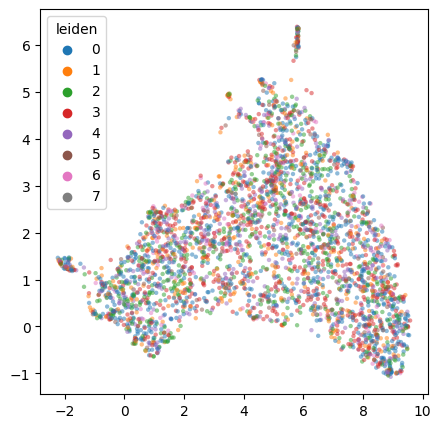

In [19]:
# make pca of the features
from sklearn.decomposition import PCA
pca_coord = PCA(n_components=50).fit_transform(features)

from umap import UMAP
umap_coord = UMAP(n_components=2, random_state=42).fit_transform(pca_coord)

# make scatter plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=umap_coord[:, 0], y=umap_coord[:, 1], hue=vis_adata.obs.leiden, ax=ax, s=10, linewidth=0, alpha=0.5)